In [36]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


### Excercise 1:  Random  cooefficient ploynomial
Construct 4 randon numbers from normal distribution 
use them as cofficients for creating and plotting 4th degree polynomial

In [37]:
# create 4 random cofficients from normal distribution
# mean of distribution 
mu = 0
# var of distribution
var = 1
nCoeff = 4
coeff_rand =  np.random.normal(loc=mu, scale=var, size=nCoeff)
print(coeff_rand)

x_min = -5
x_max = 5
# create x values
x = np.linspace(x_min, x_max,1000)
# equation to plot
y = coeff_rand[0] + coeff_rand[1]*x + coeff_rand[2]*x**2 + coeff_rand[3]*x**3
# create string for function name to  the title
fName = f'{coeff_rand[0]:.2f} + {coeff_rand[1]:.2f}x + {coeff_rand[2]:.2f}x^2 + {coeff_rand[3]:.2f}x^3'
# above shows up with + in between terms, e.g -.1 + -0.2x + -0.3x^2 , while this should look with +- as - .
# this is done below to create better string
fName = fName.replace('+ -', '- ')

[-0.23464643  0.68941529 -0.97885162 -0.0823403 ]


In [38]:
def plot_polynomial(x,y,figsize, linestyle,xlabel,ylabel,funcName,x_min,x_max):
    #Specify figure size
    plt.figure(figsize=figsize)
    # specify plot line width
    plt.plot(x,y,linestyle=linestyle)
    # specify plot x and y labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # specify label and its location
    plt.title(funcName)
    # specify the limits for plotting
    plt.xlim(x_min,x_max)
    plt.ylim([np.min(y),np.max(y)])
    plt.grid()
    

### Excercise 2: redo Exercise 1 using for loop to make it more generic

In [69]:
y_inloop = 0
# loop through the coefficients and create the equation : for all x, get corresponding y in one go, 
# but allows having any number of cofficients
# display equation also needs to be created on the go

fName_inloop = ''
for i,coeff in enumerate(coeff_rand):
    y_inloop = y_inloop + coeff*x**i   
    fName_inloop = fName_inloop + f' + {coeff:.2f}x^{i}'  
# check if the two arrays are equal
assert(np.allclose(y,y_inloop)) 
print(fName_inloop)
fName_inloop = fName_inloop.replace('+ -', '-')
print(fName_inloop)

 + -0.23x^0 + 0.69x^1 + -0.98x^2 + -0.08x^3
 -0.23x^0 + 0.69x^1 -0.98x^2 -0.08x^3


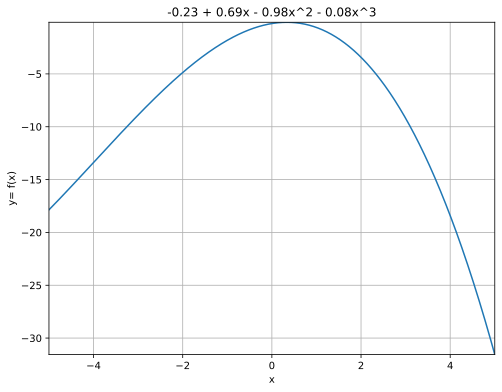

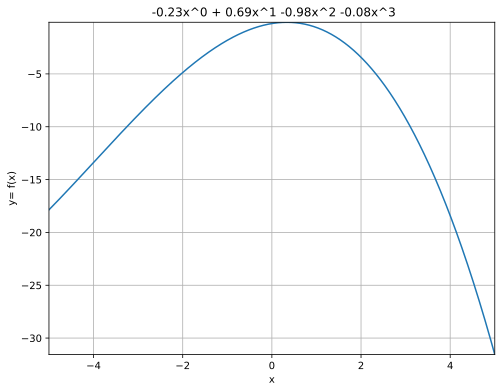

In [70]:
# plot first equation
figsize = (8,6)
linestyle = 'solid'
xlabel = 'x'
ylabel = 'y= f(x)'
funcName = fName
plot_polynomial(x,y,figsize, linestyle,xlabel,ylabel,funcName,x_min,x_max)

# plot second equation
funcName = fName_inloop
plot_polynomial(x,y_inloop,figsize, linestyle,xlabel,ylabel,funcName,x_min,x_max)

### Exercise 3: implement `fx = x2-2x/x2-4`

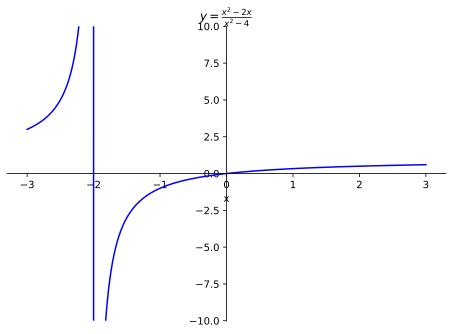

In [86]:
xmin = -3
xmax = 3
x = np.linspace(x_min, x_max,1001)
sym_x = sp.var('x')
# Simpy notation convention: equation written from lowest to highest power of beta
sym_y = (sym_x**2 - 2*sym_x)/(sym_x**2 - 4)
p1 = sp.plot(sym_y,(sym_x,xmin, xmax), ylim = (-10,10),line_color='blue', line_style='solid', \
        xlabel='x',ylabel= None, grid=True,title = f'$y= {sp.latex(sym_y)}$')